# Libs and dataset import

In [1]:
%%bash
cd '/content/drive/MyDrive/Colab Notebooks/ressources/la beubli/treetagger'
# Download the tagger package for your system (PC-Linux, Mac OS-X, ARM64, ARMHF, ARM-Android, PPC64le-Linux).
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
tar -xzvf tree-tagger-linux-3.2.4.tar.gz
# Download the tagging scripts into the same directory.
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tagger-scripts.tar.gz
gunzip tagger-scripts.tar.gz
# Download the installation script install-tagger.sh.
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/install-tagger.sh
# Download the parameter files for the languages you want to process.
# list of all files (parameter files) https://cis.lmu.de/~schmid/tools/TreeTagger/#parfiles
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/english.par.gz

wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/french.par.gz

sh install-tagger.sh
cd ..
sudo pip install treetaggerwrapper

bin/
bin/train-tree-tagger
bin/separate-punctuation
bin/tree-tagger
bin/tree-tagger-flush
cmd/
cmd/lookup.perl
COPYRIGHT
doc/
doc/sigdat95.pdf
doc/nemlap94.pdf
FILES
README
Release-Notes

TreeTagger version for PC-Linux installed.
Tagging scripts installed.
English parameter file installed.
French parameter file installed.
Tagging scripts installed.
Path variables modified in tagging scripts.

You might want to add /content/drive/MyDrive/Colab Notebooks/ressources/la beubli/treetagger/cmd and /content/drive/MyDrive/Colab Notebooks/ressources/la beubli/treetagger/bin to the PATH variable so that you do not need to specify the full path to run the tagging scripts.

  Created wheel for treetaggerwrapper: filename=treetaggerwrapper-2.3-py3-none-any.whl size=40772 sha256=8bb95c9cf5200c57ce03d3b2b818d9dd8c5ccd1d2a9214a547242ceb35816e4a
  Stored in directory: /root/.cache/pip/wheels/a0/93/50/47079639c52033b2e2b865a59654eea6832068149414cb78a5
Successfully built treetaggerwrapper


--2022-03-20 00:51:29--  https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
Resolving cis.lmu.de (cis.lmu.de)... 129.187.148.72, 2001:4ca0:4f01::5
Connecting to cis.lmu.de (cis.lmu.de)|129.187.148.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1889240 (1.8M) [application/x-gzip]
Saving to: ‘tree-tagger-linux-3.2.4.tar.gz.15’

     0K .......... .......... .......... .......... ..........  2%  246K 7s
    50K .......... .......... .......... .......... ..........  5%  482K 5s
   100K .......... .......... .......... .......... ..........  8% 24.9M 3s
   150K .......... .......... .......... .......... .......... 10% 43.1M 3s
   200K .......... .......... .......... .......... .......... 13%  398K 3s
   250K .......... .......... .......... .......... .......... 16% 79.9M 2s
   300K .......... .......... .......... .......... .......... 18% 19.8M 2s
   350K .......... .......... .......... .......... .......... 21% 71.7M 2s
   40

In [2]:
!pip install --upgrade treetaggerwrapper
!pip install googletrans==4.0.0-rc1

     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 1.3 MB 9.9 MB/s 
     |████████████████████████████████| 42 kB 962 kB/s 
     |████████████████████████████████| 53 kB 1.1 MB/s 
     |████████████████████████████████| 65 kB 3.0 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=ec955288f5474ac59f7698006b2826bec97110b6a6b11e2ce6bc7b70e86d8bbf
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans


In [3]:
#load libs
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
import re
import pprint   # For proper print of sequences.
import treetaggerwrapper
from googletrans import Translator
from nltk.tokenize import sent_tokenize 
import glob

In [4]:
complete_french_bible = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ressources/la beubli/complete_french_bible/complete_bible.csv')
complete_french_bible

,Unnamed: 0,chapter_number,page_number,line_number,sentence
0,0,1.0,1.0,1,"Au commencement, Dieu créa les cieux et la terre."
1,1,1.0,1.0,2,La terre était informe et vide: il y avait des...
2,2,1.0,1.0,3,Dieu dit: Que la lumière soit! Et la lumière fut.
3,3,1.0,1.0,4,Dieu vit que la lumière était bonne; et Dieu s...
4,4,1.0,1.0,5,"Dieu appela la lumière jour, et il appela les ..."
...,...,...,...,...,...
31097,31097,66.0,22.0,17,Et l'Esprit et l'épouse disent: Viens. Et que ...
31098,31098,66.0,22.0,18,Je le déclare à quiconque entend les paroles d...
31099,31099,66.0,22.0,19,et si quelqu'un retranche quelque chose des pa...
31100,31100,66.0,22.0,20,"Celui qui atteste ces choses dit: Oui, je vien..."


# Some "il" close analysis

In [5]:
il_containing_sentences = complete_french_bible[complete_french_bible.sentence.str.match(r'(\bil|\bIl)\s')]

In [6]:
il_containing_sentences['sentence'] = il_containing_sentences.sentence.astype(str)

In [7]:
il_containing_sentences['nb_il'] = il_containing_sentences.sentence.str.count(r'(\bil\s)')
il_containing_sentences['nb_Il'] = il_containing_sentences.sentence.str.count(r'(\bIl\s)')
il_containing_sentences

,Unnamed: 0,chapter_number,page_number,line_number,sentence,nb_il,nb_Il
65,65,1.0,3.0,10,Il répondit: J'ai entendu ta voix dans le jard...,0,1
71,71,1.0,3.0,16,Il dit à la femme: J'augmenterai la souffrance...,1,1
72,72,1.0,3.0,17,Il dit à l'homme: Puisque tu as écouté la voix...,0,1
73,73,1.0,3.0,18,"il te produira des épines et des ronces, et tu...",1,0
107,107,1.0,5.0,2,"Il créa l'homme et la femme, il les bénit, et ...",2,1
...,...,...,...,...,...,...,...
31057,31057,66.0,21.0,4,"Il essuiera toute larme de leurs yeux, et la m...",1,1
31070,31070,66.0,21.0,17,"Il mesura la muraille, et trouva cent quarante...",0,1
31080,31080,66.0,21.0,27,"Il n'entrera chez elle rien de souillé, ni per...",1,1
31083,31083,66.0,22.0,3,Il n'y aura plus d'anathème. Le trône de Dieu ...,0,1


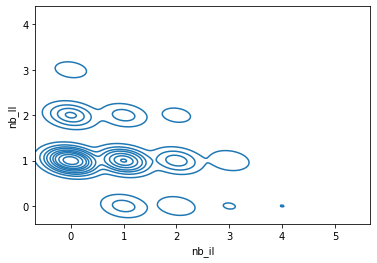

In [8]:
il_containing_sentences[['nb_il', 'nb_Il']].corr()

sns.kdeplot(data=il_containing_sentences, x='nb_il', y='nb_Il')

We can see that the majority of sentences have a single "Il", then a single "il", then any combination of both. 

# Regex replacement would be ideal

We known which cases will handle the best scenarios. 
In these cases, ils/elle/elles, we can apply the replacement.
In the "il" only case, we should split the text line into sentences and translate to map autorisations

In [9]:
test_sentence = "Il prit entre ses mains le miel, dont il mangea pendant la route; et lorsqu'il fut arrivé près de son père et de sa mère, il leur en donna, et ils en mangèrent. Mais il ne leur dit pas qu'il avait pris ce miel dans le corps du lion."

# safe part
test_sentence = re.sub(r'ils', 'iels', test_sentence)

# dangerous part
test_sentence = re.sub(r'Il', 'Iel', test_sentence)
test_sentence = re.sub(r'il', 'iel', test_sentence)
test_sentence

"Iel prit entre ses mains le miel, dont iel mangea pendant la route; et lorsqu'iel fut arrivé près de son père et de sa mère, iel leur en donna, et iels en mangèrent. Mais iel ne leur dit pas qu'iel avait pris ce miel dans le corps du lion."

However, this method doesn't work when trying to understand whether "il" is allowed to be modified, and which one is it ? (one "il" can be changed while another in the same sentence cannot). 

Moreover, "fils" matches with our regex as it contains "ils", even when including the protecting space char inside the regex.  

# Complete dataset tagging

In [10]:
complete_french_bible = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ressources/la beubli/complete_french_bible/complete_bible.csv', index_col=0)
complete_french_bible

,chapter_number,page_number,line_number,sentence
0,1.0,1.0,1,"Au commencement, Dieu créa les cieux et la terre."
1,1.0,1.0,2,La terre était informe et vide: il y avait des...
2,1.0,1.0,3,Dieu dit: Que la lumière soit! Et la lumière fut.
3,1.0,1.0,4,Dieu vit que la lumière était bonne; et Dieu s...
4,1.0,1.0,5,"Dieu appela la lumière jour, et il appela les ..."
...,...,...,...,...
31097,66.0,22.0,17,Et l'Esprit et l'épouse disent: Viens. Et que ...
31098,66.0,22.0,18,Je le déclare à quiconque entend les paroles d...
31099,66.0,22.0,19,et si quelqu'un retranche quelque chose des pa...
31100,66.0,22.0,20,"Celui qui atteste ces choses dit: Oui, je vien..."


In [11]:
# tagger_en = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR='/content/drive/MyDrive/Colab Notebooks/ressources/la beubli/treetagger') # treetagger is the installation dir
tagger_fr = treetaggerwrapper.TreeTagger(TAGLANG='fr', TAGDIR='/content/drive/MyDrive/Colab Notebooks/ressources/la beubli/treetagger') # treetagger is the installation dir

#tag french and english strings
def tag_french(french_string):
  tags = tagger_fr.tag_text(text=french_string, tagblanks=True, numlines=True)
  return treetaggerwrapper.make_tags(tags)

tag_list = []
for index, row in tqdm(complete_french_bible.iterrows(), total=len(complete_french_bible.index)):
  tag_list.append(tag_french(row['sentence']))


  0%|          | 0/31102 [00:00<?, ?it/s]

## We save to a pickled file

This method allows the preservation of objects.

In [12]:
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/ressources/la beubli/tagged_french_bible/tagged_french_bible.pickle', 'wb') as fp:
  pickle.dump(tag_list, file=fp)

## We save to json

To allow for human readability (with indent) and interoperation (reverse engineering is possible).

In [13]:
import json

with open('/content/drive/MyDrive/Colab Notebooks/ressources/la beubli/tagged_french_bible/tagged_french_bible.json', 'w', encoding="utf8") as fp:
  json.dump(tag_list, fp, indent=2)